In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#Forming the Sudoku Grid
def form_grid(sudoku_string):
    global grid
    
    for i in range(0, len(sudoku_string), 9):
        row = sudoku_string[i:i+9]
        temp = []
        for block in row:
            temp.append(int(block))
        grid.append(temp)    
    printGrid()

In [3]:
#Function for Printing the Grid as a Plot
def printGrid():
    global grid
    fig1, (ax1) = plt.subplots(1)
    ax1.matshow(grid, cmap='Set3', interpolation ='none', aspect = 1, origin='upper')

    for (j,i),label in np.ndenumerate(grid):
        ax1.text(i,j,label,ha='center',va='center')
        
    #plt.savefig("images2/temp_frame_" + '%04d' % counter + ".png", format="png", dpi=300,bbox_inches='tight')   #Uncomment the line below for making animations.

In [4]:
#Function to Check if a Digit can be Placed in a Square
def possible(row,column,n):
    global grid
    for i in range(0,9):
        if grid[row][i] == n:
            return False
    for i in range(0,9):
        if grid[i][column] == n:
            return False
    square_row = (row//3)*3
    square_column = (column//3)*3
    for i in range(0,3):
        for j in range(0,3):
            if grid[square_row+i][square_column+j] == n:
                return False    
    return True

In [9]:
#Soduku Solver Function (Implements All Previous Functions, Backtracking, and Recursion)
counter = 0
def solve():
    global grid
    global counter
    counter += 1
    #printGrid()  #Uncomment this line for making animations.
    
    for row in range(9):
        for column in range(9):
            if grid[row][column] == 0:
                for n in range(1,10):
                    if possible(row,column,n):
                        grid[row][column] = n
                        solve()
                        grid[row][column] = 0  
                return
    
    printGrid()
    print("It took the algorithm " + str(counter) + " steps to solve this sudoku.")

In [10]:
#Bank of Sodoku Puzzles
sudoku_string_Easy = "020506010603179000010300000001002340349010026206407800000658000508743060760001000"
sudoku_string_Medium = "017080309400000000008731000000602080200000003000090500800004000079500600000060000"
sodoku_string_AlEscargot = "100007090030020008009600500005300900010080002600004000300000010040000007007000300"

Enter your sudoku string: 100007090030020008009600500005300900010080002600004000300000010040000007007000300
It took the algorithm 8970 steps to solve this sudoku.


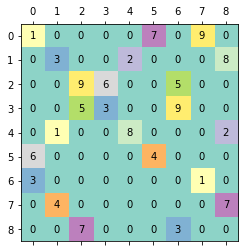

In [11]:
#Calling the functions to form the grid and solve the sudoku.
grid = []
sudoku_string_input = input("Enter your sudoku string: ")
form_grid(sudoku_string_input)
solve()